In [1]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Prepare and load the dataset
df = pd.read_csv("solar and wind energy production.csv")
df.head()

,Time,Solar_Output,Wind_Output
0,1,349.671415,277.712989
1,2,286.173570,96.379310
2,3,364.768854,104.995747
3,4,452.302986,246.312785
4,5,276.584663,194.852988


In [3]:
# Select features and normalize the data
X = df[['Solar_Output', 'Wind_Output']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

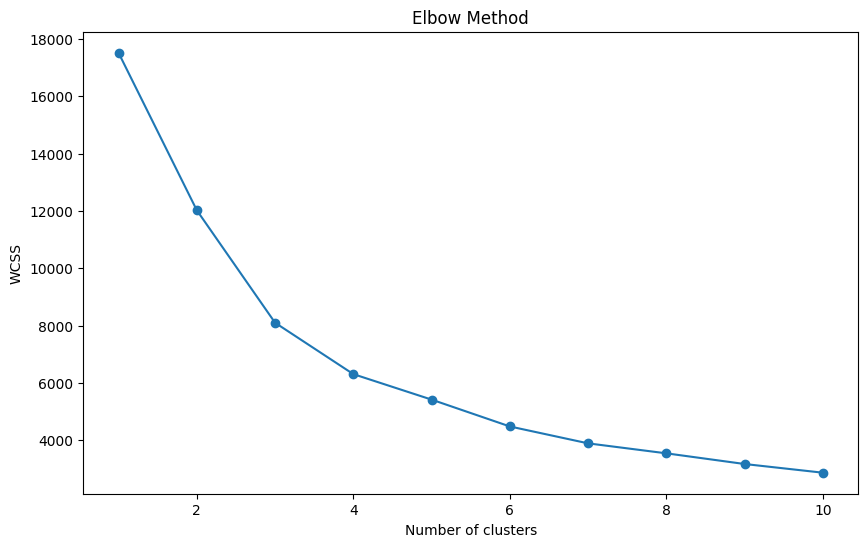

In [13]:
# Elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Create and train model
kmeans = KMeans(n_clusters = 4, random_state = 42)
# Fit the model
df['Cluster'] = kmeans.fit_predict(X)

In [15]:
# Evaluate model performance
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.31


Text(0.5, 1.0, 'Clustering of Solar and Wind Energy Production Outputs')

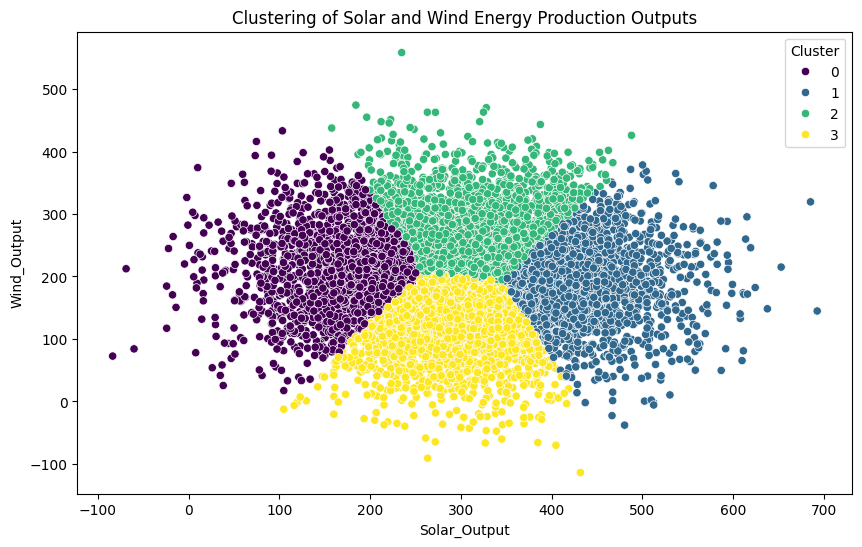

In [16]:
# Visualization
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x = 'Solar_Output', y = 'Wind_Output', hue = 'Cluster', palette = 'viridis')
plt.title('Clustering of Solar and Wind Energy Production Outputs')